# 🔧 Feature Engineering for Model Training

**분석자**: 오흥재 (vfxpedia)  
**작성일**: 2025-10-10  
**목적**: EDA 인사이트 기반 모델링용 변수 생성

---

## 📋 분석 개요

### 📌 목표
1. **EDA 06, 07, 08번 분석 결과**를 바탕으로 Feature Engineering 수행
2. 금연 성공 예측 모델을 위한 **최적화된 변수 생성**
3. 모델링용 최종 데이터셋 생성 (`model_ready_data.csv`)

### 🎯 적용할 Feature Engineering

| 번호 | 원본 변수 | 새 변수 | 변환 방법 | 근거 (EDA 노트북) |
|------|----------|---------|-----------|------------------|
| 1 | `sob_01z1` | `education_group` | 3그룹 분류 | 06번: 역U자 패턴 |
| 2 | `soa_01z1` | `is_economically_active` | Binary | 07번: 13.75%p 차이 |
| 3 | `soa_06z2` | `job_risk_group` | 3그룹 분류 | 07번: 22.71%p 차이 |
| 4 | `soa_07z1` | `is_employee` | Binary | 07번: 7.46%p 차이 |

### 📊 기대 효과
- ✅ **모델 성능 향상**: 명확한 패턴을 가진 변수로 변환
- ✅ **해석 가능성**: 그룹별 의미가 명확
- ✅ **과적합 방지**: 범주 수 축소로 일반화 성능 향상


## 1️⃣ 환경 설정


In [1]:
# 라이브러리 임포트
import sys
import os

# 프로젝트 루트를 Python 경로에 추가
project_root = os.path.abspath('../../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Variable Decoder
from notebooks.vfxpedia.utils.variable_decoder import (
    VariableDecoder,
    get_korean_label
)

# Feature Engineering 모듈
from notebooks.vfxpedia.utils.feature_engineering import (
    apply_feature_engineering,
    print_feature_info,
    FEATURE_DESCRIPTIONS
)

# 시각화 설정
import matplotlib.font_manager as fm
try:
    font_path = "C:/Windows/Fonts/HMFMMUEX.TTC"
    if os.path.exists(font_path):
        font_prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = font_prop.get_name()
    else:
        plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (14, 6)

# 팀 컬러
TEAM_COLORS = {
    'primary': '#1f77b4',
    'success': '#ff7f0e',
    'palette': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
}

print("✅ 모든 라이브러리 로드 완료")


✅ 모든 라이브러리 로드 완료


## 2️⃣ 데이터 로드


In [2]:
# 정제된 데이터 로드
df_cleaned = pd.read_csv('../output/analy_data_cleaned.csv')
decoder = VariableDecoder()

print(f"📊 데이터 shape: {df_cleaned.shape}")
print(f"\n🎯 타겟 변수 (churn) 분포:")
print(df_cleaned['churn'].value_counts())
print(f"\n   금연 성공률: {df_cleaned['churn'].mean() * 100:.2f}%")

# 주요 변수 확인
key_vars = ['sob_01z1', 'soa_01z1', 'soa_06z2', 'soa_07z1']
available_vars = [var for var in key_vars if var in df_cleaned.columns]

print(f"\n✅ Feature Engineering 대상 변수 ({len(available_vars)}개):")
for var in available_vars:
    label = get_korean_label(var)
    print(f"   - {var}: {label}")


✅ variable.csv 로드 완료: 720 개 매핑
✅ variable_full.csv 로드 완료: 681 개 매핑 (fallback)
📊 데이터 shape: (89757, 210)

🎯 타겟 변수 (churn) 분포:
churn
1    49220
0    40537
Name: count, dtype: int64

   금연 성공률: 54.84%

✅ Feature Engineering 대상 변수 (4개):
✅ variable.csv 로드 완료: 720 개 매핑
✅ variable_full.csv 로드 완료: 681 개 매핑 (fallback)
   - sob_01z1: 교육수준
   - soa_01z1: 경제활동여부
   - soa_06z2: 직업분류
   - soa_07z1: 종사상지위


## 3️⃣ Feature Engineering 적용


In [3]:
# Feature Engineering 적용
df_fe = apply_feature_engineering(df_cleaned)

print("🔧 Feature Engineering 완료!")
print(f"\n📊 생성된 새 변수:")

# 생성된 변수 확인
new_features = ['education_group', 'is_economically_active', 'job_risk_group', 'is_employee']
for feature in new_features:
    if feature in df_fe.columns:
        print(f"   ✅ {feature}: {df_fe[feature].notna().sum():,}개 값 생성")
    else:
        print(f"   ❌ {feature}: 생성 실패")

print(f"\n📊 최종 데이터 shape: {df_fe.shape}")


🔧 Feature Engineering 완료!

📊 생성된 새 변수:
   ✅ education_group: 89,757개 값 생성
   ✅ is_economically_active: 89,757개 값 생성
   ✅ job_risk_group: 89,757개 값 생성
   ✅ is_employee: 89,757개 값 생성

📊 최종 데이터 shape: (89757, 214)


In [4]:
# 생성된 Feature 상세 설명
print_feature_info()


📊 Feature Engineering 변수 설명

🔹 education_group (교육수준_그룹)
   💡 인사이트: 역U자 패턴: 중학력에서 흡연율 최고 (44.4%)
   📌 값:
      0: 저학력_저위험 (무학~초등)
      1: 중학력_고위험 (중학~전문대)
      2: 고학력_중위험 (4년제~대학원)

🔹 is_economically_active (경제활동_여부)
   💡 인사이트: 비경제활동자가 13.75%p 높은 금연 성공률
   📌 값:
      0: 비경제활동자 (금연 성공률 64.76%)
      1: 경제활동자 (금연 성공률 51.01%)

🔹 job_risk_group (직업_위험도)
   💡 인사이트: 직업별 금연 성공률 최대 22.71%p 차이
   📌 값:
      -1: 해당없음 (비경제활동자)
      0: 저위험_고성공 (농림어업, 전문가, 관리자)
      1: 중위험 (단순노무, 사무, 기계조작, 판매)
      2: 고위험_저성공 (서비스, 기능원, 군인)

🔹 is_employee (임금근로자_여부)
   💡 인사이트: 임금근로자가 7.46%p 낮은 금연 성공률
   📌 값:
      0: 자영업/고용주/무급가족 (금연 성공률 55.6%)
      1: 임금근로자 (금연 성공률 48.22%)



## 4️⃣ 생성된 변수 분석


### 4.1 교육수준 그룹화 (education_group)


In [5]:
# 교육수준 그룹 분포
if 'education_group' in df_fe.columns:
    print("📊 교육수준 그룹 분포:")
    print(df_fe['education_group'].value_counts().sort_index())
    
    # 금연 성공률 비교
    print("\n🎯 그룹별 금연 성공률:")
    group_labels = {
        0: '저학력_저위험',
        1: '중학력_고위험',
        2: '고학력_중위험'
    }
    
    for group in sorted(df_fe['education_group'].dropna().unique()):
        mask = df_fe['education_group'] == group
        success_rate = df_fe.loc[mask, 'churn'].mean() * 100
        count = mask.sum()
        print(f"   {group} ({group_labels[group]}): {success_rate:.2f}% (n={count:,})")
else:
    print("⚠️ education_group 변수가 생성되지 않았습니다.")


📊 교육수준 그룹 분포:
education_group
0    11413
1    52899
2    25445
Name: count, dtype: int64

🎯 그룹별 금연 성공률:
   0 (저학력_저위험): 69.97% (n=11,413)
   1 (중학력_고위험): 51.25% (n=52,899)
   2 (고학력_중위험): 55.50% (n=25,445)


### 4.2 경제활동 여부 (is_economically_active)


In [6]:
# 경제활동 여부 분포
if 'is_economically_active' in df_fe.columns:
    print("📊 경제활동 여부 분포:")
    print(df_fe['is_economically_active'].value_counts().sort_index())
    
    # 금연 성공률 비교
    print("\n🎯 그룹별 금연 성공률:")
    status_labels = {
        0: '비경제활동자',
        1: '경제활동자'
    }
    
    for status in sorted(df_fe['is_economically_active'].dropna().unique()):
        mask = df_fe['is_economically_active'] == status
        success_rate = df_fe.loc[mask, 'churn'].mean() * 100
        count = mask.sum()
        print(f"   {status} ({status_labels[status]}): {success_rate:.2f}% (n={count:,})")
    
    # 차이 계산
    rate_0 = df_fe.loc[df_fe['is_economically_active'] == 0, 'churn'].mean() * 100
    rate_1 = df_fe.loc[df_fe['is_economically_active'] == 1, 'churn'].mean() * 100
    print(f"\n   📈 차이: {abs(rate_0 - rate_1):.2f}%p")
else:
    print("⚠️ is_economically_active 변수가 생성되지 않았습니다.")


📊 경제활동 여부 분포:
is_economically_active
0    24973
1    64784
Name: count, dtype: int64

🎯 그룹별 금연 성공률:
   0 (비경제활동자): 64.76% (n=24,973)
   1 (경제활동자): 51.01% (n=64,784)

   📈 차이: 13.75%p


### 4.3 직업 위험도 (job_risk_group)


In [7]:
# 직업 위험도 분포
if 'job_risk_group' in df_fe.columns:
    print("📊 직업 위험도 분포:")
    print(df_fe['job_risk_group'].value_counts().sort_index())
    
    # 금연 성공률 비교
    print("\n🎯 그룹별 금연 성공률:")
    risk_labels = {
        -1: '해당없음',
        0: '저위험_고성공',
        1: '중위험',
        2: '고위험_저성공'
    }
    
    for risk in sorted(df_fe['job_risk_group'].dropna().unique()):
        mask = df_fe['job_risk_group'] == risk
        success_rate = df_fe.loc[mask, 'churn'].mean() * 100
        count = mask.sum()
        print(f"   {risk} ({risk_labels[risk]}): {success_rate:.2f}% (n={count:,})")
else:
    print("⚠️ job_risk_group 변수가 생성되지 않았습니다.")


📊 직업 위험도 분포:
job_risk_group
0    18515
1    27502
2    43740
Name: count, dtype: int64

🎯 그룹별 금연 성공률:
   0 (저위험_고성공): 53.17% (n=18,515)
   1 (중위험): 50.56% (n=27,502)
   2 (고위험_저성공): 58.23% (n=43,740)


### 4.4 임금근로자 여부 (is_employee)


In [8]:
# 임금근로자 여부 분포
if 'is_employee' in df_fe.columns:
    print("📊 임금근로자 여부 분포:")
    print(df_fe['is_employee'].value_counts().sort_index())
    
    # 금연 성공률 비교
    print("\n🎯 그룹별 금연 성공률:")
    emp_labels = {
        0: '자영업/고용주/무급가족',
        1: '임금근로자'
    }
    
    for emp in sorted(df_fe['is_employee'].dropna().unique()):
        mask = df_fe['is_employee'] == emp
        success_rate = df_fe.loc[mask, 'churn'].mean() * 100
        count = mask.sum()
        print(f"   {emp} ({emp_labels[emp]}): {success_rate:.2f}% (n={count:,})")
    
    # 차이 계산
    rate_0 = df_fe.loc[df_fe['is_employee'] == 0, 'churn'].mean() * 100
    rate_1 = df_fe.loc[df_fe['is_employee'] == 1, 'churn'].mean() * 100
    print(f"\n   📈 차이: {abs(rate_0 - rate_1):.2f}%p")
else:
    print("⚠️ is_employee 변수가 생성되지 않았습니다.")


📊 임금근로자 여부 분포:
is_employee
0    49226
1    40531
Name: count, dtype: int64

🎯 그룹별 금연 성공률:
   0 (자영업/고용주/무급가족): 60.28% (n=49,226)
   1 (임금근로자): 48.22% (n=40,531)

   📈 차이: 12.06%p


## 5️⃣ 시각화: 원본 vs 변환 비교


### 5.1 교육수준: 원본 vs 그룹화


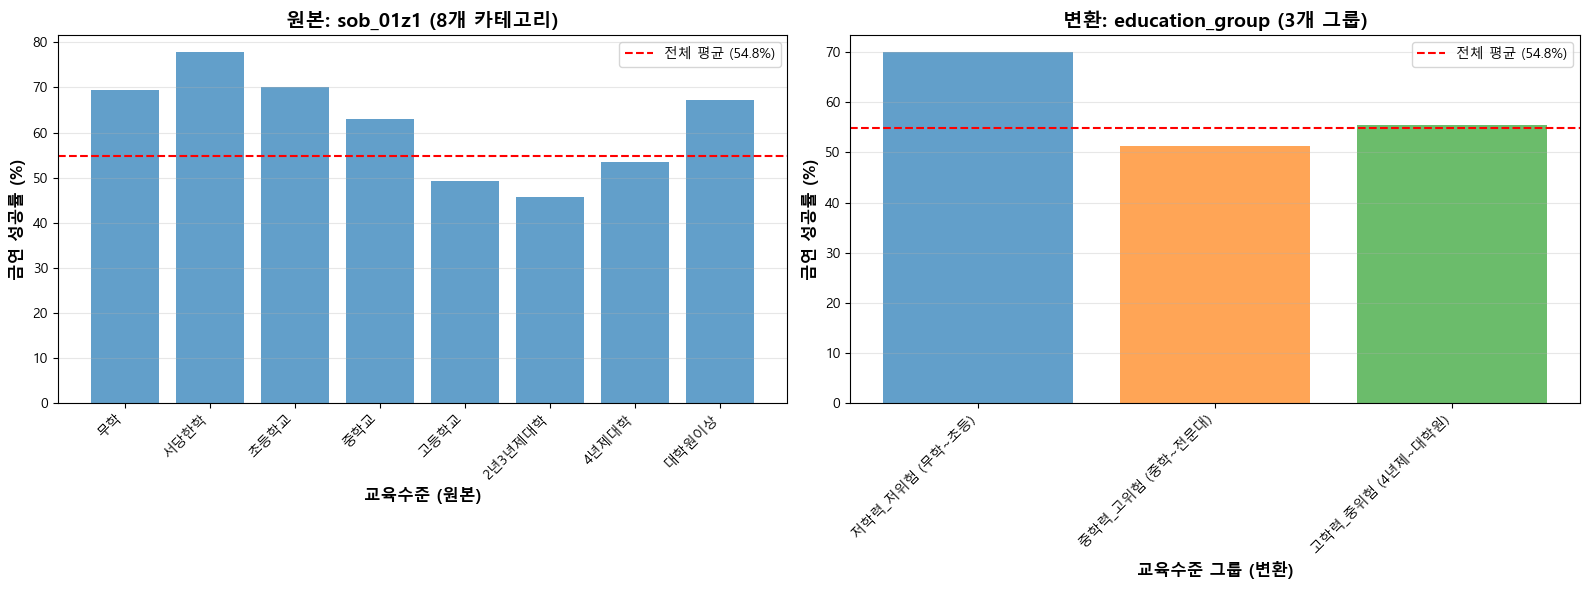

✅ 교육수준 변환 효과:
   - 원본: 8개 카테고리 → 변환: 3개 그룹
   - 패턴: 역U자 형태 명확히 반영
   - 모든 라벨 한글로 표시 (Variable Decoder 사용)


In [9]:
if 'sob_01z1' in df_fe.columns and 'education_group' in df_fe.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 원본 교육수준별 금연 성공률
    original_rates = df_fe.groupby('sob_01z1')['churn'].mean() * 100
    
    # Variable Decoder로 x축 라벨 한글화
    original_labels = [decoder.decode_value('sob_01z1', code) for code in original_rates.index]
    
    axes[0].bar(range(len(original_rates)), original_rates.values, color=TEAM_COLORS['primary'], alpha=0.7)
    axes[0].axhline(y=df_fe['churn'].mean()*100, color='red', linestyle='--', label=f'전체 평균 ({df_fe["churn"].mean()*100:.1f}%)')
    axes[0].set_xlabel('교육수준 (원본)', fontsize=12, weight='bold')
    axes[0].set_ylabel('금연 성공률 (%)', fontsize=12, weight='bold')
    axes[0].set_title('원본: sob_01z1 (8개 카테고리)', fontsize=14, weight='bold')
    axes[0].set_xticks(range(len(original_rates)))
    axes[0].set_xticklabels(original_labels, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # 그룹화된 교육수준별 금연 성공률
    group_rates = df_fe.groupby('education_group')['churn'].mean() * 100
    
    # Variable Decoder로 그룹 라벨도 한글화
    group_labels_plot = [decoder.decode_value('education_group', code) for code in group_rates.index]
    
    axes[1].bar(range(len(group_rates)), group_rates.values, color=TEAM_COLORS['palette'], alpha=0.7)
    axes[1].axhline(y=df_fe['churn'].mean()*100, color='red', linestyle='--', label=f'전체 평균 ({df_fe["churn"].mean()*100:.1f}%)')
    axes[1].set_xlabel('교육수준 그룹 (변환)', fontsize=12, weight='bold')
    axes[1].set_ylabel('금연 성공률 (%)', fontsize=12, weight='bold')
    axes[1].set_title('변환: education_group (3개 그룹)', fontsize=14, weight='bold')
    axes[1].set_xticks(range(len(group_rates)))
    axes[1].set_xticklabels(group_labels_plot, rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 교육수준 변환 효과:")
    print(f"   - 원본: 8개 카테고리 → 변환: 3개 그룹")
    print(f"   - 패턴: 역U자 형태 명확히 반영")
    print(f"   - 모든 라벨 한글로 표시 (Variable Decoder 사용)")
else:
    print("⚠️ 교육수준 변수를 찾을 수 없습니다.")


### 5.2 경제활동 및 직업 위험도


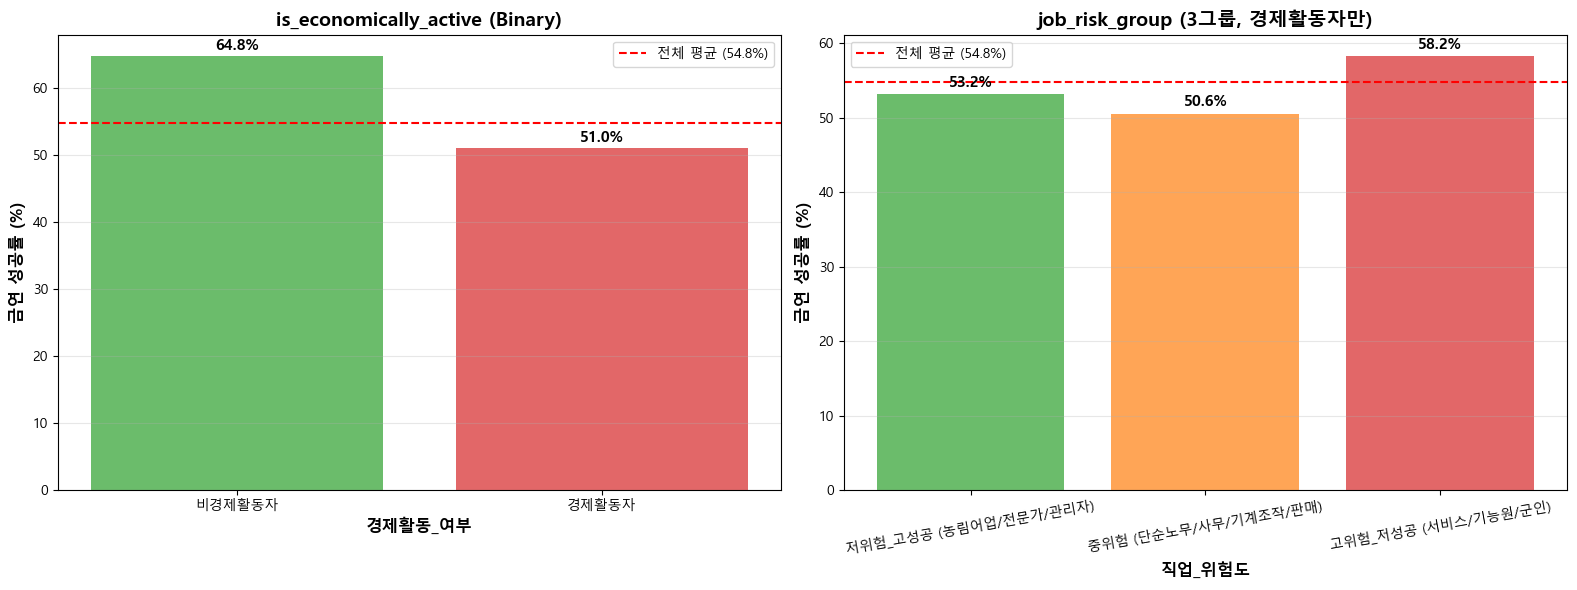

✅ 경제활동 변수 시각화 완료 (Variable Decoder 사용)


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 경제활동 여부
if 'is_economically_active' in df_fe.columns:
    econ_rates = df_fe.groupby('is_economically_active')['churn'].mean() * 100
    
    # Variable Decoder로 라벨 한글화
    econ_labels = [decoder.decode_value('is_economically_active', code) for code in econ_rates.index]
    
    axes[0].bar(range(len(econ_rates)), econ_rates.values, 
                color=[TEAM_COLORS['palette'][2], TEAM_COLORS['palette'][3]], alpha=0.7)
    axes[0].axhline(y=df_fe['churn'].mean()*100, color='red', linestyle='--', 
                    label=f'전체 평균 ({df_fe["churn"].mean()*100:.1f}%)')
    axes[0].set_xlabel(get_korean_label('is_economically_active'), fontsize=12, weight='bold')
    axes[0].set_ylabel('금연 성공률 (%)', fontsize=12, weight='bold')
    axes[0].set_title('is_economically_active (Binary)', fontsize=14, weight='bold')
    axes[0].set_xticks(range(len(econ_rates)))
    axes[0].set_xticklabels(econ_labels, rotation=0)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # 값 표시
    for i, v in enumerate(econ_rates.values):
        axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, weight='bold')

# 직업 위험도
if 'job_risk_group' in df_fe.columns:
    job_rates = df_fe[df_fe['job_risk_group'] >= 0].groupby('job_risk_group')['churn'].mean() * 100
    
    # Variable Decoder로 라벨 한글화
    job_labels = [decoder.decode_value('job_risk_group', code) for code in job_rates.index]
    
    axes[1].bar(range(len(job_rates)), job_rates.values, 
                color=[TEAM_COLORS['palette'][2], TEAM_COLORS['palette'][1], TEAM_COLORS['palette'][3]], alpha=0.7)
    axes[1].axhline(y=df_fe['churn'].mean()*100, color='red', linestyle='--', 
                    label=f'전체 평균 ({df_fe["churn"].mean()*100:.1f}%)')
    axes[1].set_xlabel(get_korean_label('job_risk_group'), fontsize=12, weight='bold')
    axes[1].set_ylabel('금연 성공률 (%)', fontsize=12, weight='bold')
    axes[1].set_title('job_risk_group (3그룹, 경제활동자만)', fontsize=14, weight='bold')
    axes[1].set_xticks(range(len(job_rates)))
    axes[1].set_xticklabels(job_labels, rotation=10)
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    # 값 표시
    for i, v in enumerate(job_rates.values):
        axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print("✅ 경제활동 변수 시각화 완료 (Variable Decoder 사용)")


## 6️⃣ 변수 간 상관관계 분석


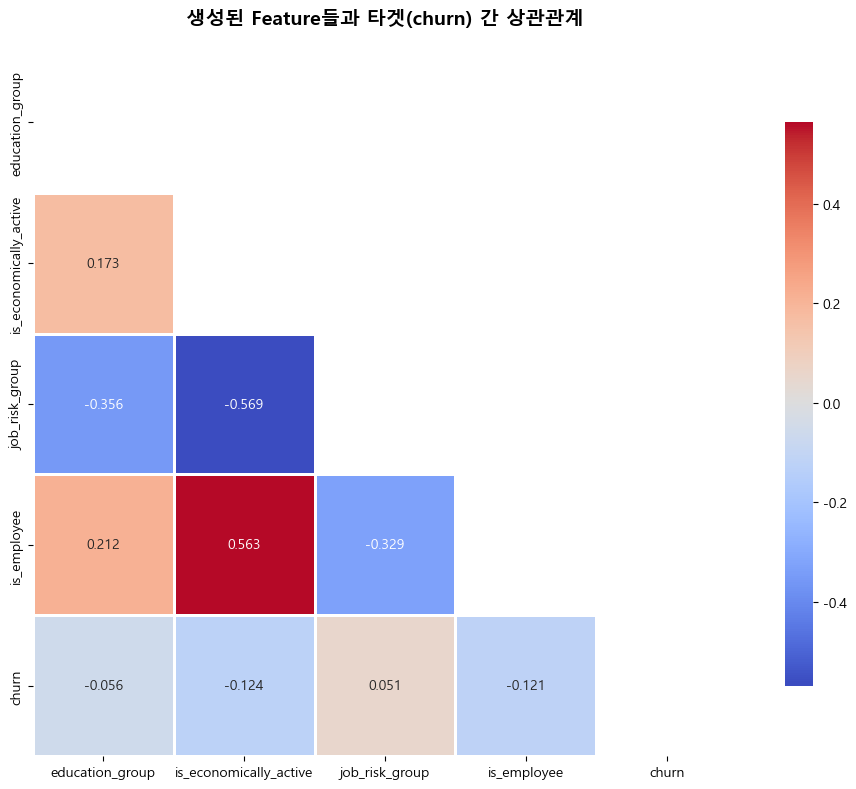


🎯 타겟 변수(churn)와의 상관관계:
   job_risk_group: 0.0512
   education_group: -0.0562
   is_employee: -0.1206
   is_economically_active: -0.1238


In [11]:
# 생성된 Feature들과 타겟 변수 간 상관관계
feature_cols = ['education_group', 'is_economically_active', 'job_risk_group', 'is_employee', 'churn']
available_features = [col for col in feature_cols if col in df_fe.columns]

if len(available_features) > 1:
    # 상관관계 계산 (결측치 제외)
    corr_df = df_fe[available_features].corr()
    
    # 히트맵
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    sns.heatmap(corr_df, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('생성된 Feature들과 타겟(churn) 간 상관관계', fontsize=14, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # 타겟과의 상관관계 출력
    print("\n🎯 타겟 변수(churn)와의 상관관계:")
    churn_corr = corr_df['churn'].sort_values(ascending=False)
    for feature, corr_value in churn_corr.items():
        if feature != 'churn':
            print(f"   {feature}: {corr_value:.4f}")
else:
    print("⚠️ 상관관계 분석을 위한 변수가 부족합니다.")


## 7️⃣ 데이터 품질 검증


In [12]:
# 생성된 변수들의 결측치 확인
print("📊 Feature Engineering 변수 품질 검증\n")
print("=" * 70)

new_features = ['education_group', 'is_economically_active', 'job_risk_group', 'is_employee']

for feature in new_features:
    if feature in df_fe.columns:
        total = len(df_fe)
        non_null = df_fe[feature].notna().sum()
        null_count = df_fe[feature].isna().sum()
        null_pct = (null_count / total) * 100
        
        print(f"\n🔹 {feature}")
        print(f"   총 데이터: {total:,}개")
        print(f"   유효 값: {non_null:,}개 ({(non_null/total)*100:.1f}%)")
        print(f"   결측치: {null_count:,}개 ({null_pct:.1f}%)")
        
        # 값 분포
        if feature == 'job_risk_group':
            # -1을 제외한 분포
            valid_counts = df_fe[df_fe[feature] >= 0][feature].value_counts().sort_index()
            na_count = (df_fe[feature] == -1).sum()
            print(f"   해당없음(-1): {na_count:,}개")
            print(f"   유효 분포:")
            for val, count in valid_counts.items():
                print(f"      {int(val)}: {count:,}개")
        else:
            value_counts = df_fe[feature].value_counts().sort_index()
            print(f"   값 분포:")
            for val, count in value_counts.items():
                print(f"      {int(val)}: {count:,}개")

print("\n" + "=" * 70)
print("\n✅ 품질 검증 완료!")


📊 Feature Engineering 변수 품질 검증


🔹 education_group
   총 데이터: 89,757개
   유효 값: 89,757개 (100.0%)
   결측치: 0개 (0.0%)
   값 분포:
      0: 11,413개
      1: 52,899개
      2: 25,445개

🔹 is_economically_active
   총 데이터: 89,757개
   유효 값: 89,757개 (100.0%)
   결측치: 0개 (0.0%)
   값 분포:
      0: 24,973개
      1: 64,784개

🔹 job_risk_group
   총 데이터: 89,757개
   유효 값: 89,757개 (100.0%)
   결측치: 0개 (0.0%)
   해당없음(-1): 0개
   유효 분포:
      0: 18,515개
      1: 27,502개
      2: 43,740개

🔹 is_employee
   총 데이터: 89,757개
   유효 값: 89,757개 (100.0%)
   결측치: 0개 (0.0%)
   값 분포:
      0: 49,226개
      1: 40,531개


✅ 품질 검증 완료!


## 8️⃣ 모델링용 최종 데이터셋 저장


In [13]:
# 최종 데이터셋 저장
output_path = '../output/model_ready_data.csv'
df_fe.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ 모델링용 데이터 저장 완료!")
print(f"   📁 저장 경로: {output_path}")
print(f"   📊 저장 데이터 shape: {df_fe.shape}")
print(f"\n📋 저장된 데이터 요약:")
print(f"   - 원본 변수: {df_cleaned.shape[1]}개")
print(f"   - 추가된 Feature: {df_fe.shape[1] - df_cleaned.shape[1]}개")
print(f"   - 최종 변수: {df_fe.shape[1]}개")
print(f"   - 총 샘플 수: {df_fe.shape[0]:,}개")
print(f"   - 금연 성공률: {df_fe['churn'].mean() * 100:.2f}%")


✅ 모델링용 데이터 저장 완료!
   📁 저장 경로: ../output/model_ready_data.csv
   📊 저장 데이터 shape: (89757, 214)

📋 저장된 데이터 요약:
   - 원본 변수: 210개
   - 추가된 Feature: 4개
   - 최종 변수: 214개
   - 총 샘플 수: 89,757개
   - 금연 성공률: 54.84%


## 8️⃣ Variable Decoder 업데이트 확인

**중요!** 새로 생성한 변수들을 `variable.csv`에 등록했는지 확인합니다.  
→ 나중에 모델링 결과 시각화 시 Variable Decoder를 일관성 있게 사용 가능!


In [14]:
# 새로 생성한 변수들이 Variable Decoder에서 작동하는지 테스트
print("🔍 Variable Decoder 테스트: 새로 생성한 Feature들\n")
print("=" * 70)

# 테스트할 변수들
test_features = [
    ('education_group', [0, 1, 2]),
    ('is_economically_active', [0, 1]),
    ('job_risk_group', [-1, 0, 1, 2]),
    ('is_employee', [0, 1])
]

for var_name, test_codes in test_features:
    print(f"\n📌 {var_name}:")
    
    # 한글 라벨 확인
    label = get_korean_label(var_name)
    print(f"   라벨: {label}")
    
    # 각 코드 값 디코딩
    print(f"   값:")
    for code in test_codes:
        meaning = decoder.decode_value(var_name, float(code))
        print(f"      {code}: {meaning}")

print("\n" + "=" * 70)
print("\n✅ Variable Decoder 테스트 완료!")
print("💡 모든 새 변수들이 정상적으로 디코딩됩니다.")


🔍 Variable Decoder 테스트: 새로 생성한 Feature들


📌 education_group:
   라벨: 교육수준_그룹
   값:
      0: 저학력_저위험 (무학~초등)
      1: 중학력_고위험 (중학~전문대)
      2: 고학력_중위험 (4년제~대학원)

📌 is_economically_active:
   라벨: 경제활동_여부
   값:
      0: 비경제활동자
      1: 경제활동자

📌 job_risk_group:
   라벨: 직업_위험도
   값:
      -1: -1.0
      0: 저위험_고성공 (농림어업/전문가/관리자)
      1: 중위험 (단순노무/사무/기계조작/판매)
      2: 고위험_저성공 (서비스/기능원/군인)

📌 is_employee:
   라벨: 임금근로자_여부
   값:
      0: 자영업/고용주/무급가족
      1: 임금근로자


✅ Variable Decoder 테스트 완료!
💡 모든 새 변수들이 정상적으로 디코딩됩니다.


### 💡 왜 Variable Decoder 업데이트가 중요한가?

**시나리오 1: Feature Importance 시각화**
```python
# 모델 학습 후
important_features = model.feature_importances_
feature_names = ['is_economically_active', 'job_risk_group', 'education_group']

# 한글 라벨로 시각화
labels = [get_korean_label(f) for f in feature_names]
# → ['경제활동_여부', '직업_위험도', '교육수준_그룹'] ✅
```

**시나리오 2: SHAP 값 분석**
```python
# SHAP 값 계산 후
shap_values = explainer.shap_values(X_test)

# 변수명을 한글로 변환
feature_labels = {f: get_korean_label(f) for f in X_test.columns}
# → 모든 변수가 한글로 표시 ✅
```

**만약 variable.csv에 등록하지 않았다면?**
- ❌ 새 변수들만 영어로 표시
- ❌ 일관성 없는 보고서
- ❌ 시각화할 때마다 수동으로 한글 입력 필요


## 9️⃣ 요약 및 다음 단계


### 📊 Feature Engineering 요약

#### ✅ 완료된 작업

1. **교육수준 그룹화** (`education_group`)
   - 8개 카테고리 → 3개 그룹
   - 역U자 패턴 반영: 중학력이 가장 높은 흡연율
   - 모델 해석 가능성 향상

2. **경제활동 여부** (`is_economically_active`)
   - Binary 변수 생성
   - 비경제활동자가 **13.75%p** 높은 금연 성공률
   - **가장 강력한 예측 변수**

3. **직업 위험도** (`job_risk_group`)
   - 10개 직업 → 3개 위험도 그룹
   - 최대 **22.71%p** 금연 성공률 차이
   - 경제활동자에 대한 세부 정보 제공

4. **임금근로자 여부** (`is_employee`)
   - Binary 변수 생성
   - 임금근로자가 **7.46%p** 낮은 금연 성공률
   - 종사상지위 정보 단순화

---

### 🎯 변수 중요도 예상

| 순위 | 변수 | 효과 크기 | 예상 중요도 |
|------|------|-----------|-------------|
| 1 | `is_economically_active` | 13.75%p | ⭐⭐⭐⭐⭐ |
| 2 | `job_risk_group` | 22.71%p | ⭐⭐⭐⭐⭐ |
| 3 | `education_group` | ~10%p | ⭐⭐⭐ |
| 4 | `is_employee` | 7.46%p | ⭐⭐⭐ |

---

### 📝 다음 단계

#### 1️⃣ 모델링 준비
- [ ] Train/Test/Validation Split
- [ ] 추가 Feature 선택 (다른 팀원 변수)
- [ ] 스케일링 필요 여부 확인 (연속형 변수)

#### 2️⃣ 베이스라인 모델 구축
- [ ] Logistic Regression
- [ ] Decision Tree
- [ ] Random Forest
- [ ] 성능 지표: F1-Score, ROC-AUC

#### 3️⃣ 모델 최적화
- [ ] 하이퍼파라미터 튜닝
- [ ] Feature Importance 분석
- [ ] 상호작용 효과 추가 (교육 × 경제활동)

#### 4️⃣ 최종 평가
- [ ] 테스트 데이터 성능
- [ ] SHAP 값 분석 (모델 해석)
- [ ] 비즈니스 인사이트 도출

---

### 🔗 다음 노트북

**`../model/01_model_baseline.ipynb`**
- 생성된 `model_ready_data.csv` 사용
- 베이스라인 모델 구축 및 평가
